In [63]:
import os
os.environ["LOGURU_LEVEL"] = "INFO"

from ect.tracking import (
    Tracker, 
    NaiveMatcher, 
    FFTTransformer, 
    FECTTransformer, 
    FECTCorrTransformer, 
    AbsoluteCartesianTracer as PositionTracer
)

from ect.helpers import SequenceImageGenerator, IdSequenceImageGenerator
from ect import Config

from typing import Callable

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import magma, gist_heat

In [64]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 13)
t = FFTTransformer()
# p = PositionTracer(transformer=t)
m = NaiveMatcher(    
    gt = (270, 200),
    template_shape=(150, 150),
    transformer=t, thresh=0.01)

tracker = Tracker(generator=g, matcher=m)#, callback=p.callback)

In [65]:
def center(inp: np.ndarray, invfunc: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
    X, Y = inp.shape
    inp = invfunc(inp)
    out = np.zeros_like(inp)
    out[:X//2, :Y//2] = inp[X//2:, Y//2:]
    out[X//2:, :Y//2] = inp[:X//2, Y//2:]
    out[X//2:, Y//2:] = inp[:X//2, :Y//2]
    out[:X//2, Y//2:] = inp[X//2:, :Y//2]
    return out

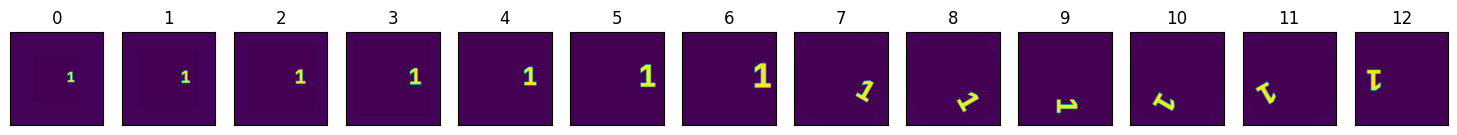

In [66]:

plt.figure(figsize=(20,5))

for idx, image in enumerate(g.images()):
    plt.subplot(1, 14, idx+1)
    plt.title(idx)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

ic| dy: 1, dx: 82
ic| dy: 2, dx: 94
ic| dy: 3, dx: 106
ic| dy: 4, dx: 117
ic| dy: 8, dx: 140
ic| dy: 10, dx: 152
ic| dy: 53, dx: 116


newpos: x=282, y=201
newpos: x=294, y=202
newpos: x=306, y=203
newpos: x=317, y=204
newpos: x=340, y=208
newpos: x=352, y=210
newpos: x=316, y=253


ic| dy: 100, dx: 73
ic| dy: 120, dx: 12
ic| dy: 110, dx: 353
ic| dy: 70, dx: 307
ic| dy: 10, dx: 287


newpos: x=273, y=300
newpos: x=212, y=320
newpos: x=153, y=310
newpos: x=107, y=270
newpos: x=87, y=210


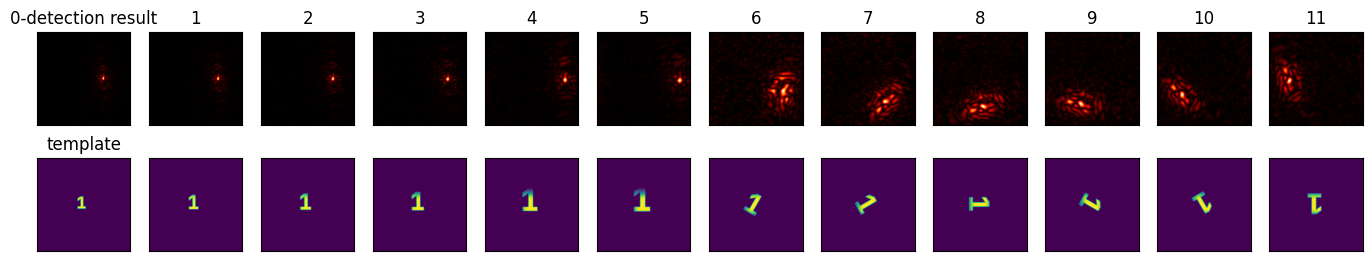

In [67]:
plt.figure(figsize=(20,3))

for idx, images in enumerate(tracker.track()):

    plt.subplot(2, 14, idx+1)
    plt.imshow(center(images[1], lambda x: np.abs(np.fft.ifft2(x))), cmap=gist_heat)
    plt.xticks([])
    plt.yticks([])
    if idx == 0:
        plt.title(f"{idx}-detection result")
    else:
        plt.title(str(idx))

    plt.subplot(2, 14, 15+idx)
    plt.imshow(images[2])
    plt.xticks([])
    plt.yticks([])
    if idx == 0:
        plt.title("template")


In [68]:
g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test/1_seq_{id}.png", 13)
# g = IdSequenceImageGenerator("/home/mateusz/Desktop/Magisterka/tracking/images/bag/color/{id:08d}.jpg", 10)

t = FECTCorrTransformer(Config(offset_value_px=5), (180, 50))
# p = PositionTracer(transformer=t)
m = NaiveMatcher(
    gt = (270, 200),
    template_shape=(150, 150),
    transformer=t, thresh=0.1, logpolar=True, offset=5)


ic| dy: 163, dx: 0
ic| x: 265, y: 200
ic| dy: 176, dx: 1
ic| x: 271, y: 200
ic| dy: 1, dx: 1
ic| x: 277, y: 200
ic| dy: 1, dx: 2
ic| x: 283, y: 200
ic| dy: 3, dx: 3
ic| x: 289, y: 200
ic| dy: 1, dx: 2
ic| x: 295, y: 200
ic| dy: 5, dx: 1
ic| x: 301, y: 200
ic| dy: 22, dx: 13
ic| x: 317, y: 211
ic| dy: 8, dx: 10
ic| x: 330, y: 213
ic| dy: 0, dx: 0
ic| x: 336, y: 213
ic| dy: 0, dx: 0
ic| x: 342, y: 213
ic| dy: 0, dx: 0
ic| x: 348, y: 213


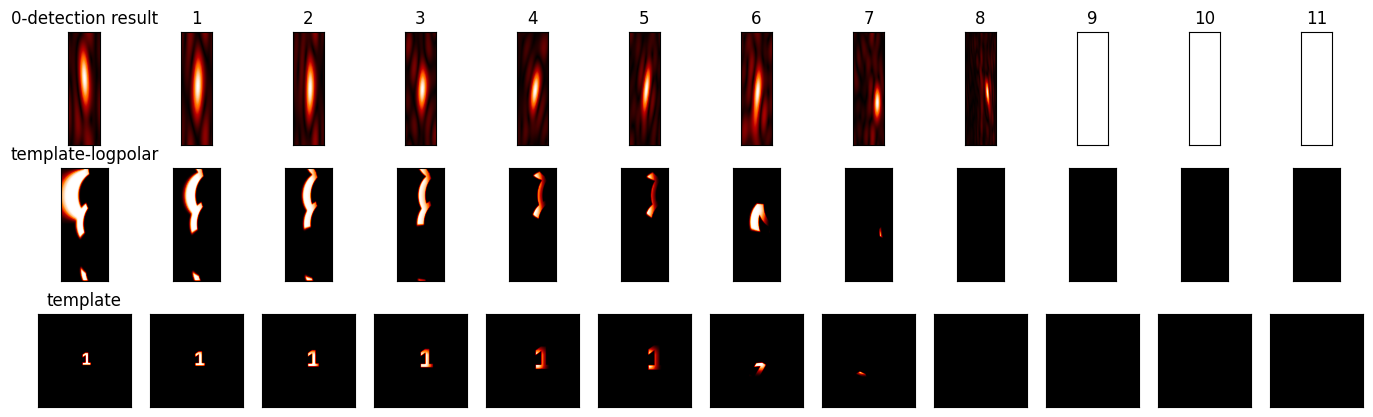

In [69]:
from ect import logpolar_new

tracker = Tracker(generator=g, matcher=m)

plt.figure(figsize=(20,5))

# inv = lambda x: ilogpolar_new(np.abs(np.fft.ifft2(x)), (400, 400), 200, Config(start_angle_deg=0, offset_value_px=0))
inv = lambda x: np.abs(np.fft.ifft2(x))

for idx, images in enumerate(tracker.track()):
    # print(idx)
    plt.subplot(3, 14, idx+1)
    if idx == 0:
        plt.title(f"{idx}-detection result")
    else:
        plt.title(str(idx))
    plt.imshow(center(images[1], inv), cmap=gist_heat)
    # plt.imshow(inv(images[0]))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 29+idx)
    plt.imshow(images[2], cmap=gist_heat)
    if idx == 0:
        plt.title("template")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 14, 15+idx)
    if idx == 0:
        plt.title("template-logpolar")
    plt.imshow(logpolar_new(images[2].copy(), (200, 200), (360, 150), 200, Config(offset_value_px=0)), cmap=gist_heat)
    plt.xticks([])
    plt.yticks([])

